# Preprocessing data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import data
df = pd.read_csv('Iris.csv')
#  Tampilkan 5 data pertama
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [2]:
# hapus atribut yang tidak digunakan
df.drop(['Id'], axis=1, inplace=True)

# tampilkan 5 data pertama
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
import sklearn
from sklearn.model_selection import train_test_split

## Bagi menjadi atribut dan label
x = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

len(x_test), len(x_train)

(30, 120)

# KNN

In [4]:
from sklearn.neighbors import KNeighborsClassifier

n_neighbours = 15
# Create Model
model_knn = KNeighborsClassifier(n_neighbours)
# Training model
model_knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [5]:
# Predict model
pred_knn = model_knn.predict(x_test)
# Evaluate using data test
accuracy = (pred_knn == y_test).sum()/len(y_test)
accuracy

0.9333333333333333

In [6]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(pred_knn, y_test)
cm

array([[ 8,  0,  0],
       [ 0, 11,  1],
       [ 0,  1,  9]], dtype=int64)

# Decision Tree

[Text(133.92000000000002, 195.696, 'X[3] <= 0.8\nentropy = 1.584\nsamples = 120\nvalue = [42, 38, 40]'),
 Text(100.44000000000001, 152.208, 'entropy = 0.0\nsamples = 42\nvalue = [42, 0, 0]'),
 Text(167.40000000000003, 152.208, 'X[3] <= 1.75\nentropy = 1.0\nsamples = 78\nvalue = [0, 38, 40]'),
 Text(66.96000000000001, 108.72, 'X[2] <= 4.95\nentropy = 0.384\nsamples = 40\nvalue = [0, 37, 3]'),
 Text(33.480000000000004, 65.232, 'entropy = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(100.44000000000001, 65.232, 'X[1] <= 2.9\nentropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(66.96000000000001, 21.744, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(133.92000000000002, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(267.84000000000003, 108.72, 'X[2] <= 4.85\nentropy = 0.176\nsamples = 38\nvalue = [0, 1, 37]'),
 Text(234.36, 65.232, 'X[1] <= 3.1\nentropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(200.88000000000002, 21.744, 'entropy = 0.0\nsamples = 2\nv

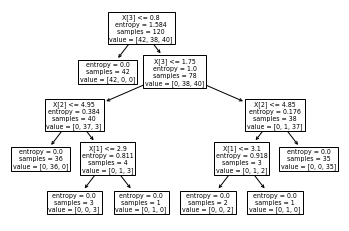

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# Create model
model_tree = DecisionTreeClassifier(criterion='entropy')
# Training model
model_tree.fit(x_train, y_train)
# Tampilkan tree
tree.plot_tree(model_tree)

In [8]:
# Predict model
pred_tree = model_tree.predict(x_test)
# Evaluate using data test
accuracy = (pred_tree == y_test).sum()/len(y_test)
accuracy

0.9

In [9]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(pred_tree, y_test)
cm

array([[ 8,  0,  0],
       [ 0, 11,  2],
       [ 0,  1,  8]], dtype=int64)

# Naive Bayes

In [10]:
from sklearn.naive_bayes import GaussianNB

# Create Model
model_gnb = GaussianNB()
# Training model
model_gnb.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [11]:
# Predict model
pred_gnb = model_gnb.predict(x_test)
# Evaluate using data test
accuracy = (pred_gnb == y_test).sum()/len(y_test)
accuracy

0.9666666666666667

In [12]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(pred_gnb, y_test)
cm

array([[ 8,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  9]], dtype=int64)

# Cross Validation

In [13]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_knn, x, y, cv=5)
scores

array([0.93333333, 1.        , 0.93333333, 0.96666667, 1.        ])

In [14]:
# Rata-rata
mean = scores.sum()/len(scores)
mean

0.9666666666666668